In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np

# Random seed for reproducibility
np.random.seed(42)

# Number of records
n = 200

# Create columns
data = {
    "Age": np.random.randint(21, 60, size=n),
    "Gender": np.random.choice(["Male", "Female"], size=n),
    "Department": np.random.choice(["HR", "Finance", "Engineering", "Sales"], size=n),
    "Education": np.random.choice(["High School", "Bachelors", "Masters", "PhD"], size=n),
    "City": np.random.choice(["Mumbai", "Delhi", "Bangalore", "Pune"], size=n),
    "Experience": np.random.exponential(scale=5, size=n).round(1),  # Right-skewed
    "Salary": np.random.normal(50000, 15000, size=n).round(0),       # Continuous with outliers
    "Hours_per_week": np.random.randint(30, 60, size=n),
    "Attrition": np.random.choice(["Yes", "No"], size=n, p=[0.2, 0.8])  # Imbalanced
}

df = pd.DataFrame(data)

# Inject missing values randomly
for col in ["Gender", "Department", "Salary", "Experience"]:
    df.loc[df.sample(frac=0.1).index, col] = np.nan

# Add some outliers
outlier_indices = np.random.choice(df.index, 5, replace=False)
df.loc[outlier_indices, "Salary"] *= 4  # Salary outliers
df.loc[outlier_indices, "Hours_per_week"] += 40  # Extreme working hours

# Shuffle data
df = df.sample(frac=1).reset_index(drop=True)

# Save dataset
df.to_csv("employee_attrition_data.csv", index=False)

print("✅ Custom dataset created and saved as 'employee_attrition_data.csv'")


✅ Custom dataset created and saved as 'employee_attrition_data.csv'


In [3]:
df

,Age,Gender,Department,Education,City,Experience,Salary,Hours_per_week,Attrition
0,31,Female,Sales,Masters,Pune,3.4,54214.0,41,Yes
1,48,Female,HR,Bachelors,Mumbai,3.2,38023.0,34,Yes
2,23,NaN,HR,High School,Delhi,2.1,21055.0,42,No
3,35,Male,Finance,Masters,Mumbai,NaN,44964.0,52,No
4,31,Female,Sales,Masters,Bangalore,3.9,57280.0,43,No
...,...,...,...,...,...,...,...,...,...
195,55,Male,Finance,Masters,Delhi,2.8,50450.0,59,No
196,23,Male,HR,Masters,Delhi,10.5,57496.0,53,No
197,50,Female,HR,Bachelors,Bangalore,1.4,NaN,56,No
198,22,Female,Engineering,Bachelors,Bangalore,3.9,69294.0,57,No


### Step 1: Understanding the Data

In [4]:
df.head()

,Age,Gender,Department,Education,City,Experience,Salary,Hours_per_week,Attrition
0,31,Female,Sales,Masters,Pune,3.4,54214.0,41,Yes
1,48,Female,HR,Bachelors,Mumbai,3.2,38023.0,34,Yes
2,23,NaN,HR,High School,Delhi,2.1,21055.0,42,No
3,35,Male,Finance,Masters,Mumbai,NaN,44964.0,52,No
4,31,Female,Sales,Masters,Bangalore,3.9,57280.0,43,No


In [39]:
df.shape

(200, 9)

In [40]:
df.columns

Index(['Age', 'Gender', 'Department', 'Education', 'City', 'Experience',
       'Salary', 'Hours_per_week', 'Attrition'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             200 non-null    int32  
 1   Gender          180 non-null    object 
 2   Department      180 non-null    object 
 3   Education       200 non-null    object 
 4   City            200 non-null    object 
 5   Experience      180 non-null    float64
 6   Salary          180 non-null    float64
 7   Hours_per_week  200 non-null    int32  
 8   Attrition       200 non-null    object 
dtypes: float64(2), int32(2), object(5)
memory usage: 12.6+ KB


In [5]:
df['Age'].std()

np.float64(11.826338674000539)

In [6]:
df['Age'].var()

np.float64(139.8622864321608)

In [7]:
df['Age'].min()

np.int32(21)

In [10]:
df['Age'].skew()

np.float64(-0.03599152508639662)

<Axes: xlabel='Age', ylabel='Count'>

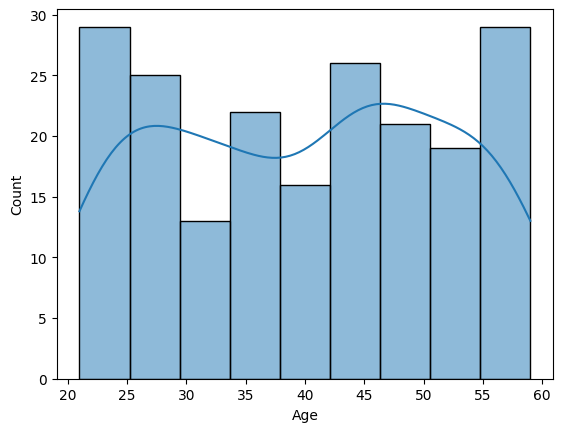

In [26]:
import matplotlib.pyplot as plt
sns.histplot(df['Age'], kde=True)

In [15]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

In [19]:
IQR=Q3-Q1
IQR

np.float64(21.0)

In [20]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("Outliers:\n", outliers)

Lower bound: -2.5
Upper bound: 81.5
Outliers:
 Empty DataFrame
Columns: [Age, Gender, Department, Education, City, Experience, Salary, Hours_per_week, Attrition]
Index: []


Text(0.5, 1.0, 'Age')

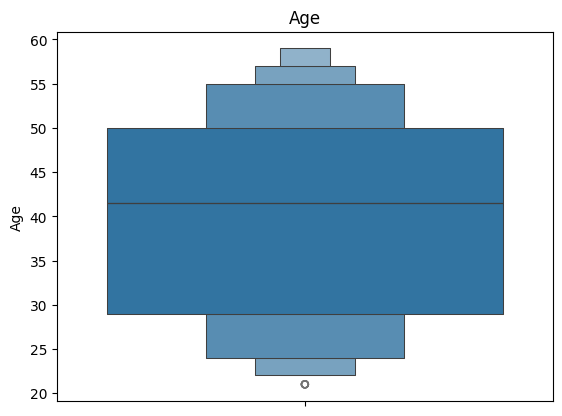

In [23]:
sns.boxenplot(y=df['Age'],showfliers=True)
plt.title('Age')


In [32]:
df['Salary'].skew()

np.float64(4.520916985851968)

In [33]:
df['Salary'].kurt()


np.float64(24.104512613289526)

<Axes: xlabel='Salary', ylabel='Density'>

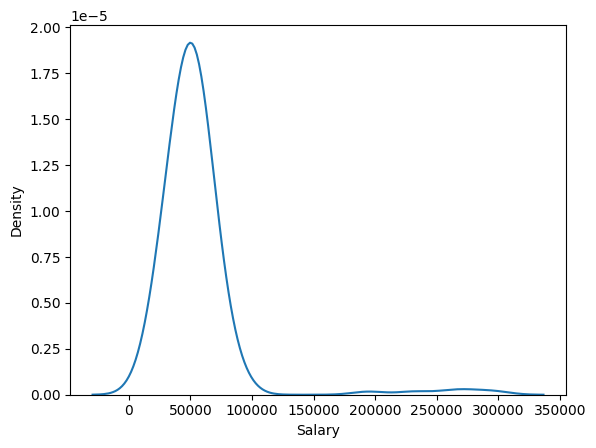

In [34]:
    sns.kdeplot(df['Salary'])

<Axes: xlabel='count', ylabel='Department'>

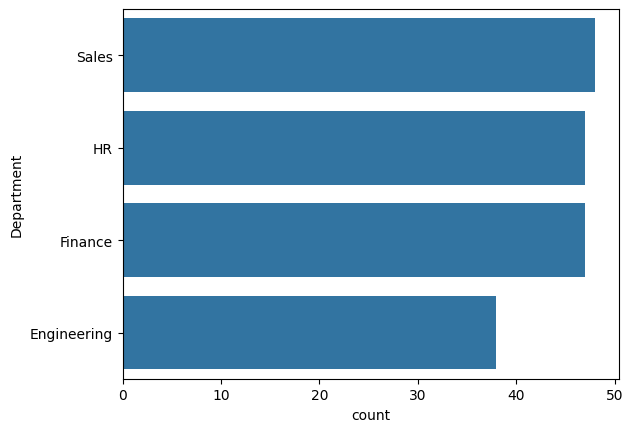

In [51]:
sns.countplot(df['Department'])

In [35]:
df['Salary'].mean()

np.float64(55070.72777777778)

In [36]:
df['Salary'].median()

np.float64(50577.0)

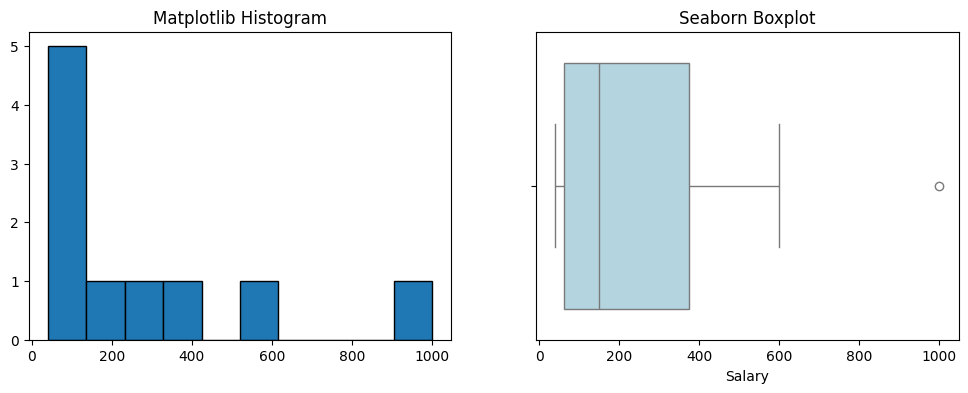

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'Salary': [40, 50, 60, 70, 100, 200, 300, 400, 600, 1000]
})

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(data['Salary'], bins=10, edgecolor='black')
plt.title("Matplotlib Histogram")

plt.subplot(1,2,2)
sns.boxplot(x='Salary', data=data, color='lightblue')
plt.title("Seaborn Boxplot")

plt.show()


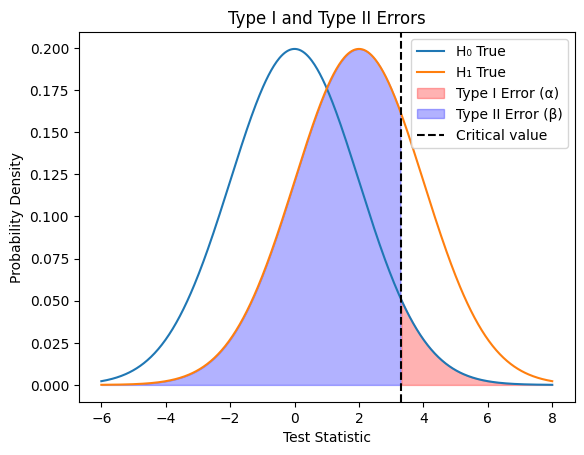

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu0, mu1, sigma = 0, 2, 2
x = np.linspace(-6, 8, 500)
pdf_H0 = norm.pdf(x, mu0, sigma)
pdf_H1 = norm.pdf(x, mu1, sigma)

# Critical region (alpha = 0.05)
z_critical = norm.ppf(0.95, mu0, sigma)
plt.plot(x, pdf_H0, label='H₀ True')
plt.plot(x, pdf_H1, label='H₁ True')

# Shade Type I Error
plt.fill_between(x, pdf_H0, 0, where=(x > z_critical), color='red', alpha=0.3, label='Type I Error (α)')
# Shade Type II Error
plt.fill_between(x, pdf_H1, 0, where=(x < z_critical), color='blue', alpha=0.3, label='Type II Error (β)')

plt.axvline(z_critical, color='black', linestyle='--', label='Critical value')
plt.legend()
plt.title('Type I and Type II Errors')
plt.xlabel('Test Statistic')
plt.ylabel('Probability Density')
plt.show()


In [37]:
import pandas as pd, numpy as np
from scipy import stats

data = pd.DataFrame({
    'Salary': [40, 50, 60, 90, 100, 150, 200]
})

print("Mean:", np.mean(data['Salary']))
print("Median:", np.median(data['Salary']))
print("Mode:", stats.mode(data['Salary'], keepdims=True)[0][0])
print("Variance:", np.var(data['Salary'], ddof=1))
print("Std Dev:", np.std(data['Salary'], ddof=1))
print("Skewness:", data['Salary'].skew())
print("Kurtosis:", data['Salary'].kurt())

q1, q3 = np.percentile(data['Salary'], [25, 75])
iqr = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
print("Outliers:", data[(data['Salary'] < lower) | (data['Salary'] > upper)])


Mean: 98.57142857142857
Median: 90.0
Mode: 40
Variance: 3380.952380952381
Std Dev: 58.145957563293955
Skewness: 0.9566019297338167
Kurtosis: 0.004732394366196324
Outliers: Empty DataFrame
Columns: [Salary]
Index: []


<Axes: ylabel='Salary'>

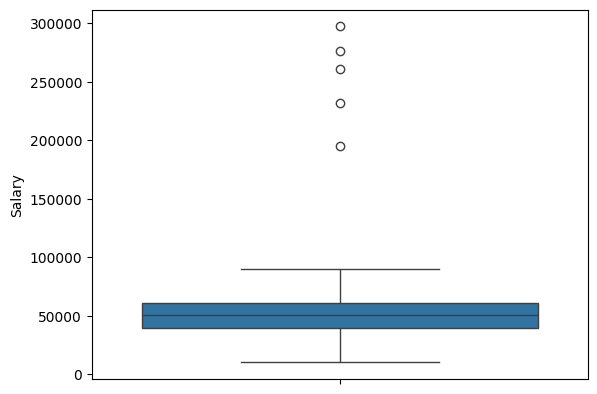

In [41]:
sns.boxplot(df['Salary'])

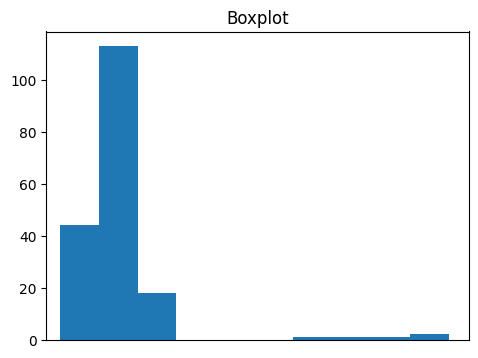

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(df['Salary'], bins=10)
plt.title("Histogram")

plt.boxplot(df['Salary'])
plt.title("Boxplot")
plt.show()


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data = pd.DataFrame({
    'Height': [150, 160, 165, 170, 175, 180, 185],
    'Weight': [50, 55, 60, 65, 70, 75, 80]
})


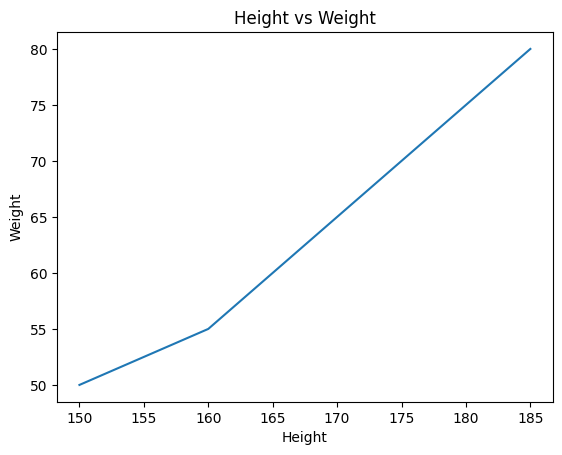

In [49]:
sns.lineplot(x='Height',y='Weight',data=data)
plt.title('Height vs Weight')
plt.show()

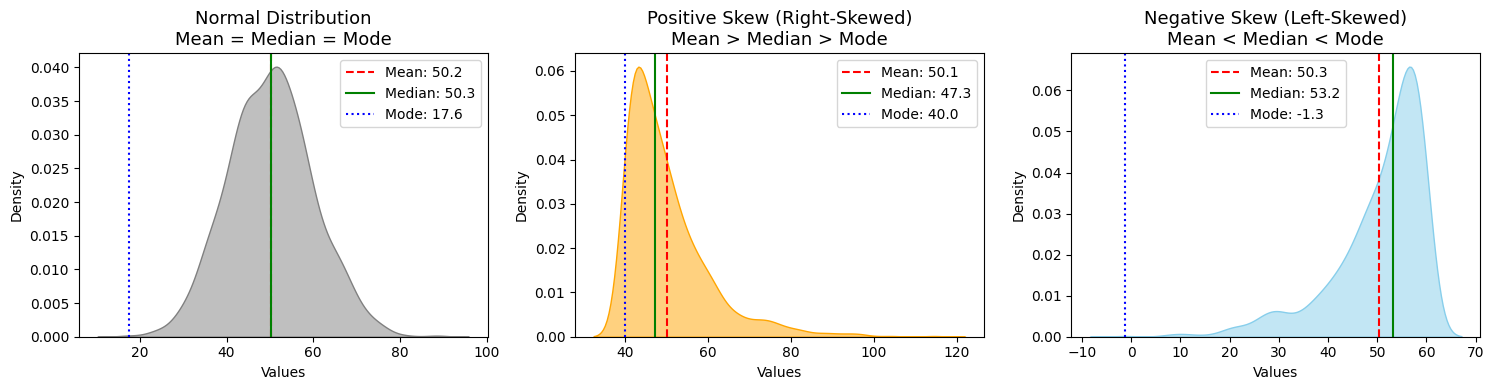

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Generate three types of data
# np.random.seed(42)
# normal = np.random.normal(50, 10, 1000)
# positive = np.random.exponential(scale=10, size=1000) + 40
# negative = 60 - np.random.exponential(scale=10, size=1000)
data=df['Age']

# Helper function to plot and annotate
def plot_skew(data, title, color):
    sns.kdeplot(data, fill=True, color=color, alpha=0.5)
    plt.title(title, fontsize=13)
    plt.xlabel("Values")
    plt.ylabel("Density")

    mean = np.mean(data)
    median = np.median(data)
    mode = stats.mode(data, keepdims=True)[0][0]

    # Plot vertical lines
    plt.axvline(mean, color='red', linestyle='--', label=f"Mean: {mean:.1f}")
    plt.axvline(median, color='green', linestyle='-', label=f"Median: {median:.1f}")
    plt.axvline(mode, color='blue', linestyle=':', label=f"Mode: {mode:.1f}")
    plt.legend()

# Plot all 3 distributions
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plot_skew(normal, "Normal Distribution\nMean = Median = Mode", "gray")

plt.subplot(1, 3, 2)
plot_skew(positive, "Positive Skew (Right-Skewed)\nMean > Median > Mode", "orange")

plt.subplot(1, 3, 3)
plot_skew(negative, "Negative Skew (Left-Skewed)\nMean < Median < Mode", "skyblue")

plt.tight_layout()
plt.show()


In [42]:
df.describe()

,Age,Experience,Salary,Hours_per_week
count,200.000000,180.000000,180.000000,200.000000
mean,40.045000,4.075000,55070.727778,45.950000
std,11.826339,4.083279,37193.380279,10.967632
min,21.000000,0.100000,10110.000000,30.000000
25%,29.000000,1.100000,39343.500000,37.000000
50%,41.500000,2.650000,50577.000000,45.000000
75%,50.000000,5.275000,60909.250000,54.000000
max,59.000000,23.000000,297232.000000,94.000000


### Step 2: Handling Missing Values

In [43]:
df.isnull().sum()

Age                0
Gender            20
Department        20
Education          0
City               0
Experience        20
Salary            20
Hours_per_week     0
Attrition          0
dtype: int64

In [44]:
df.isna().sum()


Age                0
Gender            20
Department        20
Education          0
City               0
Experience        20
Salary            20
Hours_per_week     0
Attrition          0
dtype: int64

In [45]:
df['Gender'].isnull().sum()

np.int64(20)

In [46]:
df['Gender'].unique()

array(['Female', nan, 'Male'], dtype=object)

In [47]:
df['Gender'].value_counts()

Gender
Female    97
Male      83
Name: count, dtype: int64

In [48]:
df['Gender'].value_counts(dropna=False)

Gender
Female    97
Male      83
NaN       20
Name: count, dtype: int64

#### A.Weighted Random Imputation

In [49]:
probabilities = df['Gender'].value_counts(normalize=True)

In [51]:
probabilities

Gender
Female    0.538889
Male      0.461111
Name: proportion, dtype: float64

In [52]:
df.loc[df['Gender'].isna(), 'Gender'] = np.random.choice(
    probabilities.index,
    size=df['Gender'].isna().sum(),
    p=probabilities.values
)


In [34]:
# df['Gender'].fillna(df['Gender'].mode()[0],inplace=True): this will assign all null as Femlae becouse of mode 

In [53]:
df['Gender'].value_counts(dropna=False)

Gender
Female    106
Male       94
Name: count, dtype: int64

In [54]:
df['Department'].value_counts(dropna=False)

Department
Sales          48
HR             47
Finance        47
Engineering    38
NaN            20
Name: count, dtype: int64

In [55]:
prob=df['Department'].value_counts(normalize=True)

In [56]:
prob

Department
Sales          0.266667
HR             0.261111
Finance        0.261111
Engineering    0.211111
Name: proportion, dtype: float64

In [57]:
df['Department'].fillna(df['Department'].mode()[0],inplace=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_24808\1785924934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Department'].fillna(df['Department'].mode()[0],inplace=True)


In [58]:
df['Department'].value_counts(dropna=False)

Department
Sales          68
HR             47
Finance        47
Engineering    38
Name: count, dtype: int64

In [59]:
df.isnull().sum()

Age                0
Gender             0
Department         0
Education          0
City               0
Experience        20
Salary            20
Hours_per_week     0
Attrition          0
dtype: int64

In [60]:
df['Experience'].value_counts(dropna=False)

Experience
NaN     20
1.0      7
0.7      7
0.9      6
0.8      6
        ..
7.3      1
17.4     1
11.3     1
2.8      1
10.5     1
Name: count, Length: 85, dtype: int64

##### checking if skewed or not

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt 

<Axes: xlabel='Experience', ylabel='Count'>

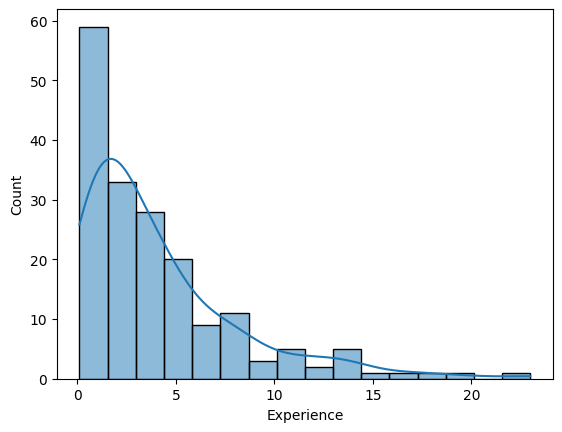

In [63]:
sns.histplot(df['Experience'], kde=True)

In [64]:
print("Skewness:", df['Experience'].skew())
df[['Experience', 'Age', 'Salary']].corr()

Skewness: 1.8401199811316504


,Experience,Age,Salary
Experience,1.000000,-0.117510,-0.000817
Age,-0.117510,1.000000,0.049574
Salary,-0.000817,0.049574,1.000000


In [65]:
df['Experience'].fillna(df['Experience'].median(), inplace=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_24808\4133857977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Experience'].fillna(df['Experience'].median(), inplace=True)


In [66]:
df['Salary'].value_counts(dropna=False)

Salary
NaN        20
38023.0     1
21055.0     1
44964.0     1
54214.0     1
           ..
39075.0     1
46178.0     1
50450.0     1
57496.0     1
69294.0     1
Name: count, Length: 181, dtype: int64

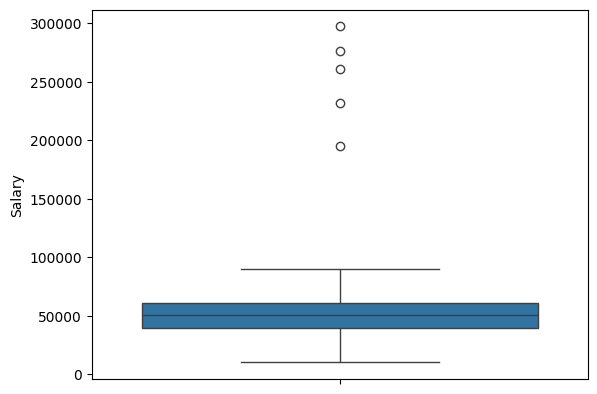

In [67]:
sns.boxplot(df['Salary'])
plt.show()

In [71]:
q1=df['Salary'].quantile(0.25)

In [72]:
q3=df['Salary'].quantile(0.75)